In [6]:
import sys
import os

cur_dir = os.getcwd()
dataset_path = os.path.join(cur_dir, "../Dataset")
script_path = os.path.join(cur_dir, "../Scripts")
print(script_path)
sys.path.append(dataset_path)
sys.path.append(script_path)

d:\УЧЕБА\Remote monitoring\Scripts\../Scripts


In [7]:
import matplotlib.pyplot as plt
import numpy as np

## Импортируем нужные скрипты


In [8]:
from importlib import reload
import ECGsignal as ecg

In [9]:
reload(ecg)
ecg.init()

In [ ]:
test_ecg = ecg.signal(patient_num=2)
ecg.plot_signal(2)

In [23]:
test_ecg = ecg.signal(number_labels={"SR" : 100, "VA" : 100, "AF" : 100}) #Количество примеров каждого класса.
#test_ecg = ecg.signal(2)

Text(0.5, 1.0, 'VA')

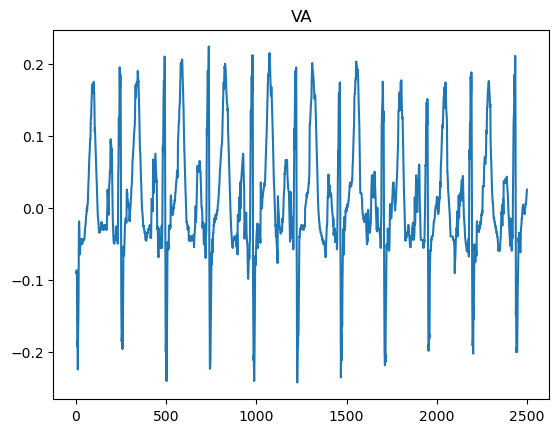

In [12]:

plt.plot(test_ecg["data"][0][0])
plt.title(test_ecg["label"][0])

# Первое число - номер строчки, второе число - номер отведения

In [13]:
import image as im
reload(im)

im.init(dt=True, norm=True, comp_fact=2)

## В ЭКГ есть скрипт, который достает из файла нужное количество экгшек, и делает из них картинки 
Он называется extract_images

[  0 255]
(2500, 2000)


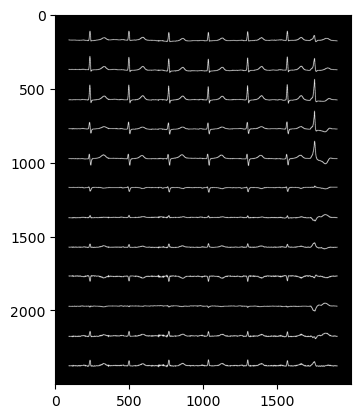

In [14]:
S = ecg.extract_images({"SR" : 2, "VA" : 1, "AF" : 1})
plt.imshow(S["data"][0], cmap= "gray")

print(np.unique(S["data"][0]))
print(S['data'][0].shape)

## В image.py скрипт, который принимает датафрейм, и по нему итерируясь, возвращает датафрейм с изображениями. Это удобно, если разбиение на трейн-тест уже произошло
images_parallel делает вычисления чуть быстрее. 

In [15]:
S = im.images_parallel(test_ecg, n_jobs=2)
S.head()

,images,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",VA
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",AF
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",SR
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",SR
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",SR


In [16]:
S = im.images(test_ecg)
S.head()

,images,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",VA
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",AF
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",SR
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",SR
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",SR


[  0 255]


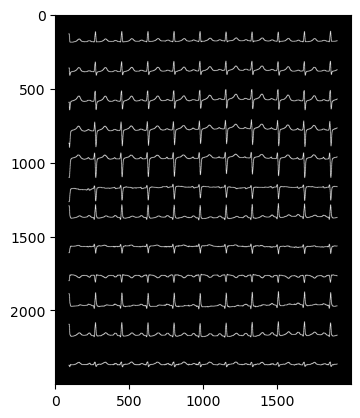

In [17]:
plt.imshow(S["images"][0], cmap="gray")
print(np.unique(S["images"][0]))

In [32]:
import VECG as vecg

reload(vecg) #Это для отображения изменений в файле без прерывания ядра

vecg.init(filtering=True, canc_showing=True, plot3D=False)

In [33]:
df_ecg = vecg.make_vecg_df(test_ecg, 0, 1)
#print(XY.dtype)

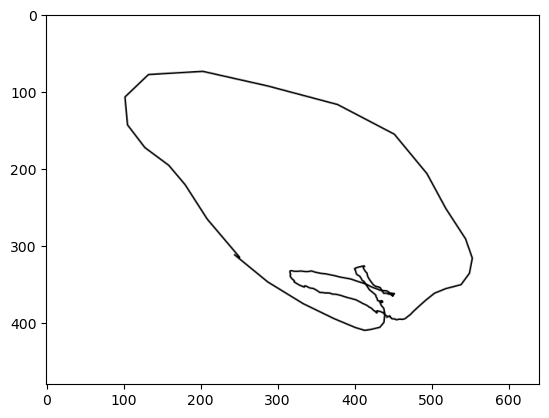

In [20]:
plt.imshow(df_ecg["XY"][0], cmap="gray")

In [22]:
M = ecg.extract_images(2)